In [23]:
import pandas as pd
#%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
matplotlib.style.use('ggplot')

import seaborn as sns
sns.set(style="whitegrid", color_codes=True, font_scale=1.5)



crimes = pd.read_csv("MontgomeryCountyCrime2013.csv")

d_time = pd.to_datetime(crimes["Dispatch Date / Time"]) #Importing specified column
week = d_time.dt.weekday_name.value_counts(sort = True) #Counting week days crimes
month = d_time.dt.month.value_counts(sort = False) #Counting months crimes
day = d_time.dt.day.value_counts(sort = False) #Counting the days
hour = d_time.dt.hour.value_counts(sort = True) #Counting hours
matplotlib.rcParams.update({'font.size': 22}) #Change font size (bigger)





In [9]:
crimes.head()

,Incident ID,CR Number,Dispatch Date / Time,Class,Class Description,Police District Name,Block Address,City,State,Zip Code,...,Sector,Beat,PRA,Start Date / Time,End Date / Time,Latitude,Longitude,Police District Number,Location,Address Number
0,200939101,13047006,10/02/2013 07:52:41 PM,511,BURG FORCE-RES/NIGHT,OTHER,25700 MT RADNOR DR,DAMASCUS,MD,20872.0,...,NaN,NaN,NaN,10/02/2013 07:52:00 PM,NaN,NaN,NaN,OTHER,NaN,25700.0
1,200952042,13062965,12/31/2013 09:46:58 PM,1834,CDS-POSS MARIJUANA/HASHISH,GERMANTOWN,GUNNERS BRANCH RD,GERMANTOWN,MD,20874.0,...,M,5M1,470.0,12/31/2013 09:46:00 PM,NaN,NaN,NaN,5D,NaN,NaN
2,200926636,13031483,07/06/2013 09:06:24 AM,1412,VANDALISM-MOTOR VEHICLE,MONTGOMERY VILLAGE,OLDE TOWNE AVE,GAITHERSBURG,MD,20877.0,...,P,6P3,431.0,07/06/2013 09:06:00 AM,NaN,NaN,NaN,6D,NaN,NaN
3,200929538,13035288,07/28/2013 09:13:15 PM,2752,FUGITIVE FROM JUSTICE(OUT OF STATE),BETHESDA,BEACH DR,CHEVY CHASE,MD,20815.0,...,D,2D1,11.0,07/28/2013 09:13:00 PM,NaN,NaN,NaN,2D,NaN,NaN
4,200930689,13036876,08/06/2013 05:16:17 PM,2812,DRIVING UNDER THE INFLUENCE,BETHESDA,BEACH DR,SILVER SPRING,MD,20815.0,...,D,2D3,178.0,08/06/2013 05:16:00 PM,NaN,NaN,NaN,2D,NaN,NaN


# Month and Week Analyze

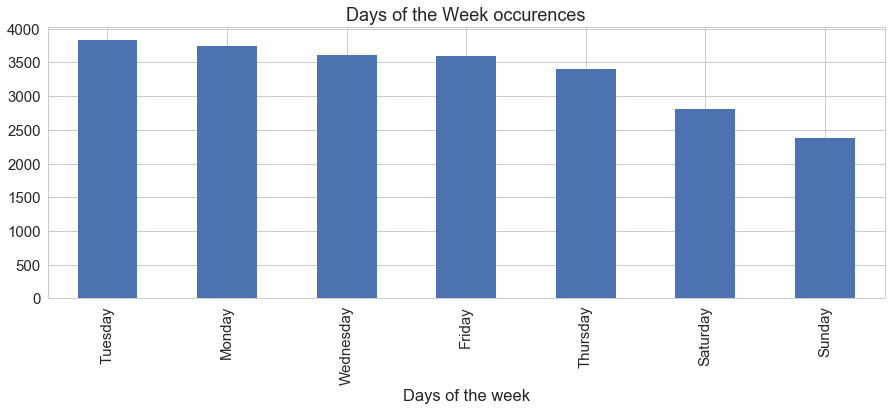

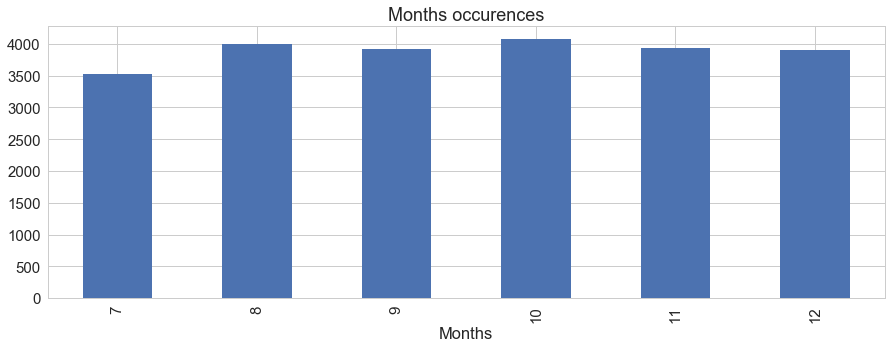

In [46]:
#Plotting week days bar
fig = plt.figure(figsize=(15,5)) #making figure bigger
weekplot = week.plot.bar()
weekplot.set_xlabel("Days of the week")
weekplot.set_title("Days of the Week occurences")
plt.show()

#Plotting months bargraph
fig = plt.figure(figsize=(15,5)) #Making figure bigger
monthplot = month.plot.bar()
monthplot.set_xlabel("Months")
monthplot.set_title("Months occurences")
plt.show()


#day.plot.bar()

# Plotting Dispatched Time

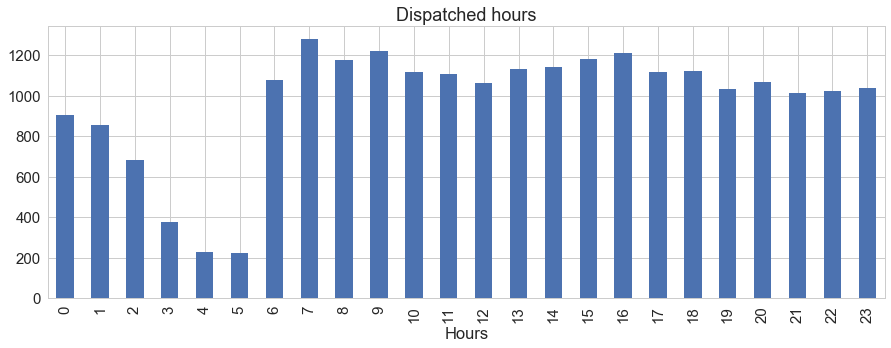

In [81]:
hour = d_time.dt.hour.value_counts(sort = True)
#print(hour)
hour.sort_index(axis=0, ascending=True,inplace=True)

#Plotting day hours bargraph
plt.figure(figsize=(15,5));
#histplot = d_time.dt.hour.plot.hist(stacked=False, bins=24)
histplot = hour.plot.bar()
histplot.set_xlabel("Hours")
histplot.set_title("Dispatched hours")
plt.show()
fig = histplot.get_figure()
#fig.savefig("total-sales.png")


# Plotting Start Date / Time

None


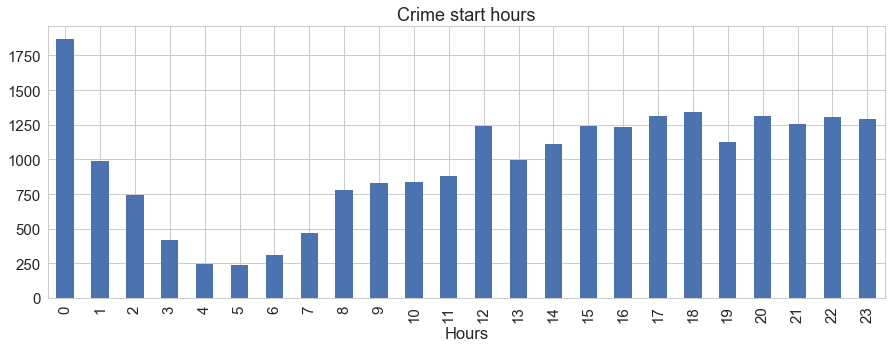

In [72]:
crime_start = pd.to_datetime(crimes["Start Date / Time"]) #Importing Start Date / Time Column
hour_start = crime_start.dt.hour.value_counts(sort = False) #Counting day hours
hour_start.sort_index(axis=0, ascending=True,inplace=True)

#Plotting  Crime Start hours bargraph
plt.figure(figsize=(15,5));
#histplot = d_time.dt.hour.plot.hist(stacked=False, bins=24)
histplot = hour_start.plot.bar()
histplot.set_xlabel("Hours")
histplot.set_title("Crime start hours")
plt.show()
fig = histplot.get_figure()
#fig.savefig("total-sales.png")

# 1. Time Analyzis
## 1.1 Comparison "Dispatch Date / Time" and Start/End Time
   Dispatached Date / Time means the time when a Police Office has been dispatched to the site whereas the Start/End Time mean the times when the crime occorred from and to, respectively.
   
   According to the Dispatched plot, it is possible to see that the peak of frequency that a Police Office has been dispatched to site where the crime occured is from 7 am to 8 am, probably meanning when the shift timetable starts. On the other hand, when seeing the Crime Start Hour plot, it is possible to analize that most of crimes occur from 0 am to 1 am with a number of over 1750 occurences. At the same period of time in Dispatched plot, we have got a number of 900 occurences, concluding that 850 crimes occured and no police office was despatched in that period.
   
   The minimum number of occurences if found from 4 am to 5 am in both plots
   
## 1.2 Month

##

# Plotting Crime Locations

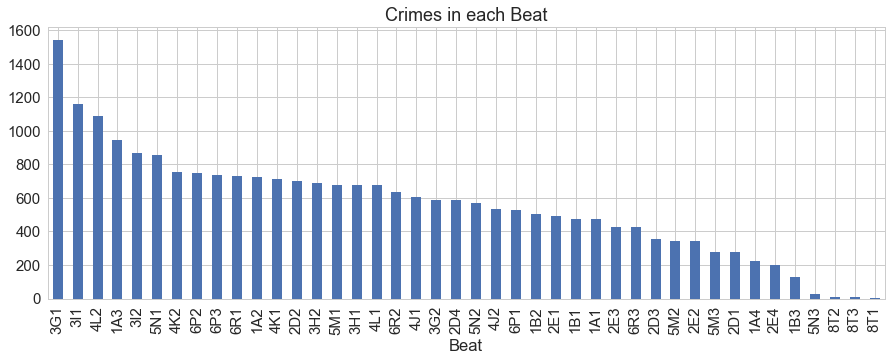

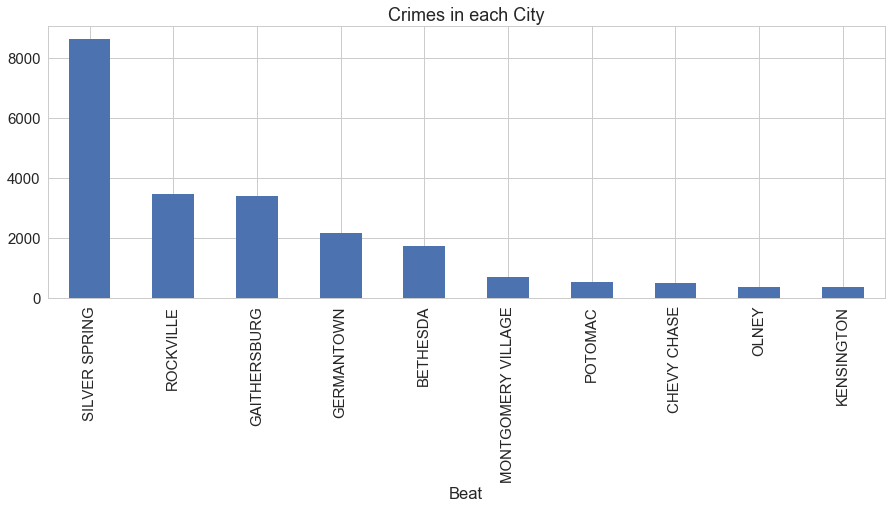

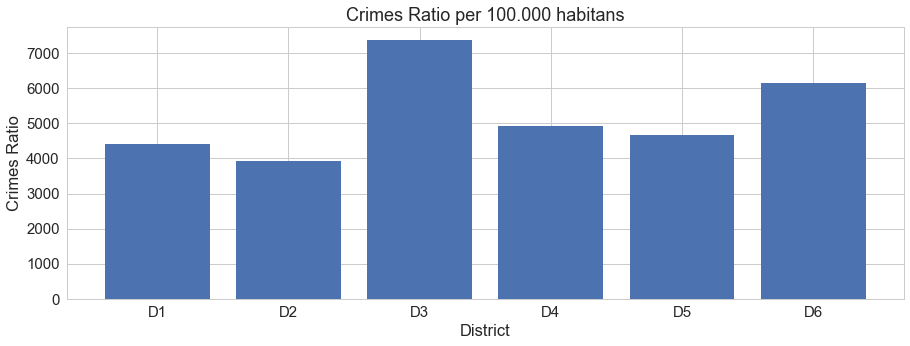

In [101]:
beat = crimes["Beat"] #Receiving Beat values
city = crimes["City"] #Receiving city values
beat_values = beat.value_counts(sort = True) #Sorting beat descending values 
city_values = city.value_counts() #Sorting city descending values
#print(beat_values)

#Crimes rates per capita
#1D - 4406.6/100.000
#2D - 3919.4/100.000
#3D - 7374,9/100.000
#4D - 4909,2/100.000
#5D - 4669,3/100.000
#6D - 6138,9/100.000

D1 = 4406.6
D2 = 3919.4
D3 = 7374.9
D4 = 4909.2
D5 = 4669.3
D6 = 6138.9

district= np.array([D1,D2,D3,D4,D5,D6])
names= ['D1','D2','D3','D4','D5','D6']
y_pos = np.arange(len(district))


fig = plt.figure(figsize=(15,5)) #Making figure bigger
barplot = beat_values.plot.bar() #plotting beat values in bars
barplot.set_xlabel("Beat")
barplot.set_title("Crimes in each Beat")
plt.show()

fig = plt.figure(figsize=(15,5)) #Making figure bigger
barplot = city_values[0:10].plot.bar() #plotting the top 10 most violent cities.
barplot.set_xlabel("Beat")
barplot.set_title("Crimes in each City")
plt.show()

fig = plt.figure(figsize=(15,5)) #Making figure bigger
barplot = plt.bar(y_pos,district)
plt.xticks(y_pos, names)
#barplot.set_xlabel("Crimes ratio")
#barplot.set_title("Crimes ratio per 100.000 habitants")
plt.ylabel('Crimes Ratio')
plt.xlabel('District')
plt.title('Crimes Ratio per 100.000 habitans')
plt.show()


# 2 Location Analyzis

In [34]:
description = crimes["Class Description"]
#print(description)
found = description.str.contains("CDS|BURG")
print(found)


0         True
1         True
2        False
3        False
4        False
5         True
6         True
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17        True
18       False
19        True
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
23339    False
23340    False
23341    False
23342    False
23343    False
23344    False
23345    False
23346    False
23347    False
23348    False
23349    False
23350    False
23351    False
23352    False
23353    False
23354    False
23355     True
23356    False
23357    False
23358    False
23359    False
23360    False
23361    False
23362    False
23363    False
23364    False
23365    False
23366    False
23367    False
23368    False
Name: Class Description, dtype: bool
